In [3]:
import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


In [4]:
data = pd.read_csv('Data_Sets/fetal_health.csv')
data.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
print(f"The dataset size: {data.shape}")


The dataset size: (2126, 22)


In [10]:

# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


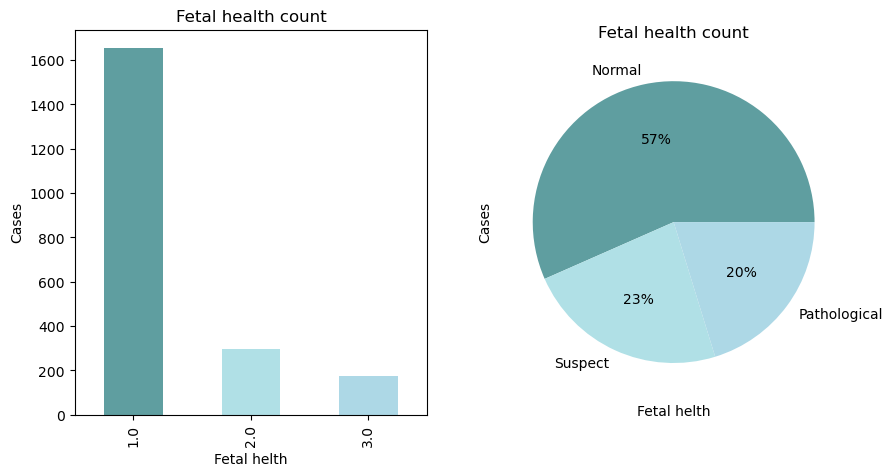

In [11]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()


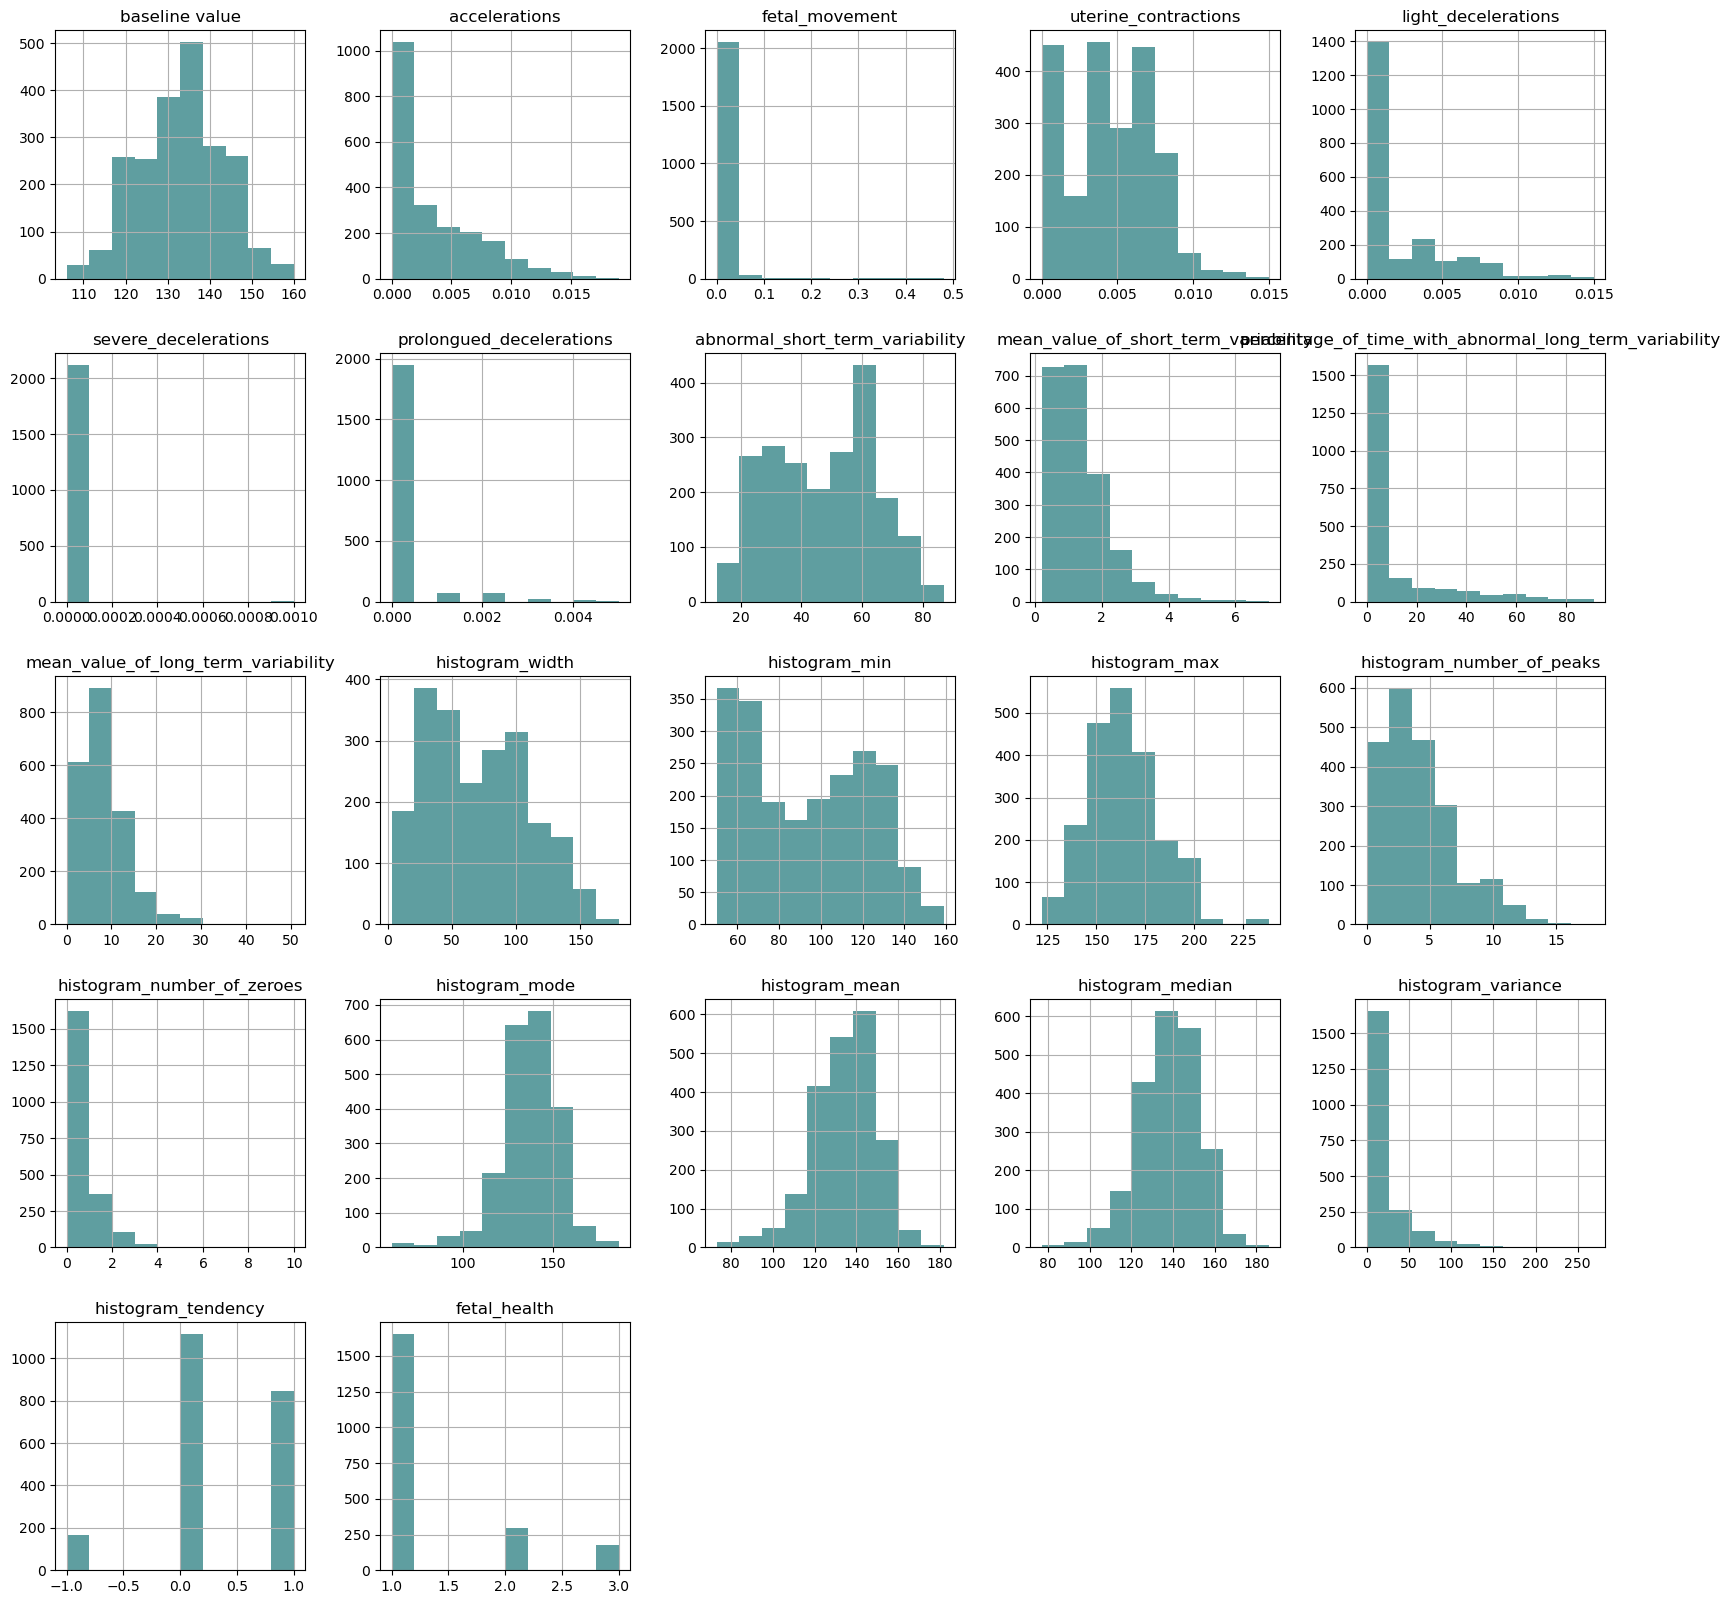

In [12]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

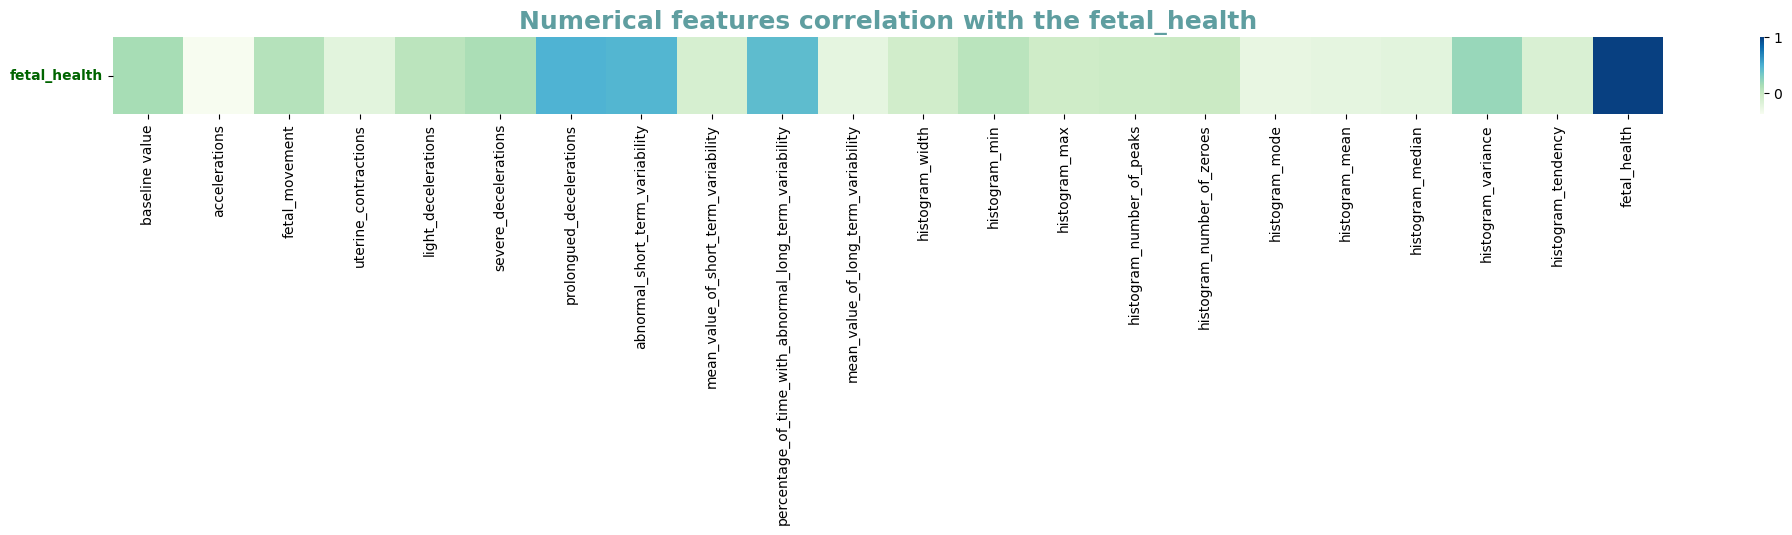

In [13]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [14]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)


In [15]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [16]:
y = data["fetal_health"]

In [17]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

In [52]:
from sklearn.preprocessing import StandardScaler
import joblib

# Ensure X_train and X_test have the same feature set and order
# X_train and X_test should be DataFrames or arrays with the same feature columns

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use in the Streamlit app
joblib.dump(scaler, 'model/scaler_final.joblib')

['model/scaler_final.joblib']

In [53]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train_scaled, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test_scaled, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test_scaled)

Baseline Logistic Regression: 0.893


In [54]:
cv_method = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


In [55]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train_scaled, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.91129032 0.89516129 0.90927419]
CrossValMeans: 0.905
CrossValStandard Deviation: 0.007


In [56]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [57]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [58]:
GridSearchCV_LR.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [59]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")


Best estimator for LR model:
LogisticRegression(C=1)


In [60]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 1, 'intercept_scaling': 1, 'tol': 0.0001}


In [61]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.905


In [62]:
# The grid search returns the following as the best parameter set
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train_scaled, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test_scaled)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train_scaled, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test_scaled, y_test)

In [63]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.138
Root Mean Square Error for Logistic Regression = 0.371
R^2(coefficient of determination) on training set = 0.907
R^2(coefficient of determination) on testing set = 0.886


In [64]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.60      0.66      0.63        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.89      0.89      0.89       638



In [65]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 29  58   1]
 [  4  12  37]]


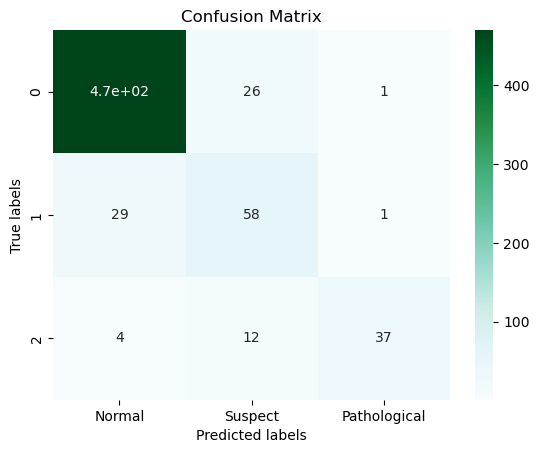

In [66]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [67]:
# Baseline model of RF with default parameters:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train_scaled, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test_scaled, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test_scaled)

Baseline Random Forest: 0.92


In [68]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train_scaled, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.93145161 0.94153226 0.93346774]
CrossValMeans: 0.935
CrossValStandard Deviation: 0.004


In [69]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]             
              }

In [70]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [71]:
# Fit model with train data
GridSearchCV_RF.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [38]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(n_estimators=200)


In [39]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.938


In [73]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_mod = random_forest.fit(X_train_scaled, y_train)
pred_random_forest = random_forest_mod.predict(X_test_scaled)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train_scaled, y_train)
score_random_forest_test = random_forest_mod.score(X_test_scaled, y_test)

In [74]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.102
Root Mean Square Error for Random Forest = 0.319
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.926


In [75]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.79      0.73      0.76        88
         3.0       0.87      0.87      0.87        53

    accuracy                           0.93       638
   macro avg       0.87      0.85      0.86       638
weighted avg       0.92      0.93      0.93       638



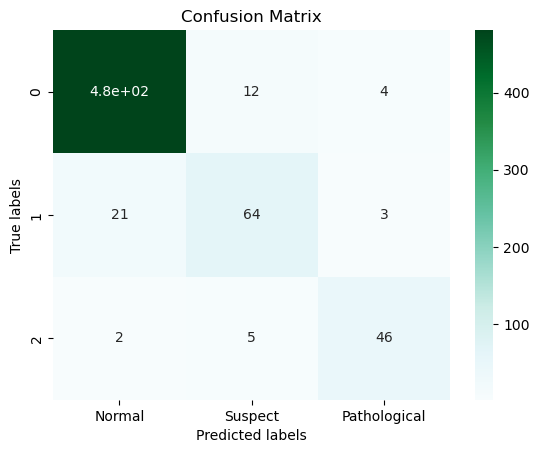

In [76]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [77]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

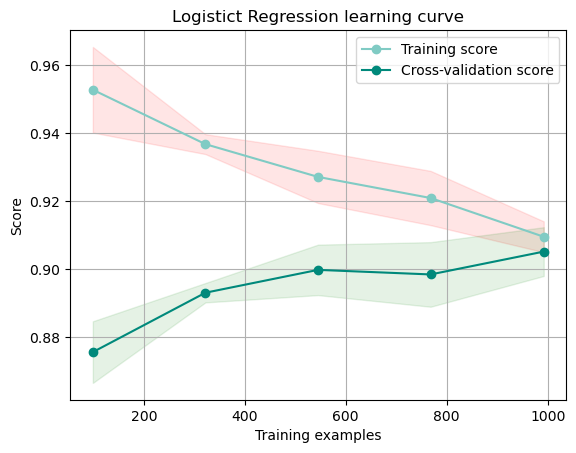

In [78]:
# Logistic Regression
plot_learning_curve(GridSearchCV_LR.best_estimator_,title = "Logistict Regression learning curve", x = X_train_scaled, y = y_train, cv = cv_method);

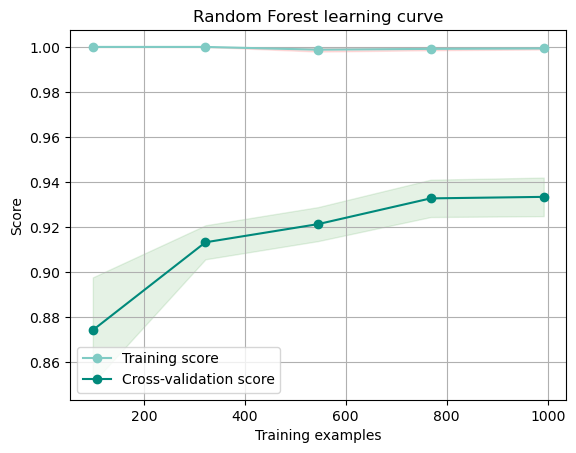

In [79]:
# Random forest
plot_learning_curve(GridSearchCV_RF.best_estimator_,title = "Random Forest learning curve", x = X_train_scaled, y = y_train, cv = cv_method);

In [80]:
results = pd.DataFrame({
                        "Model": ["Logistic Regression",
                                  "Random Forest"],
                        "Score": [logistic_regression_mod.score(X_train_scaled, y_train),
                                  random_forest_mod.score(X_train_scaled, y_train),
                                 ]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

,Model
Score,
0.999328,Random Forest
0.906586,Logistic Regression


In [81]:
import joblib

In [82]:
joblib.dump(random_forest_mod, 'model/fetal_fit_random_forest.joblib')

['model/fetal_fit_random_forest.joblib']